[-2.05529797e+03 -1.95041970e+03 -1.85114628e+03 -1.75716083e+03
 -1.66816526e+03 -1.58387911e+03 -1.50403847e+03 -1.42839496e+03
 -1.35671473e+03 -1.28877767e+03 -1.22437646e+03 -1.16331588e+03
 -1.10541202e+03 -1.05049162e+03 -9.98391421e+02 -9.48957553e+02
 -9.02044987e+02 -8.57516991e+02 -8.15244641e+02 -7.75106351e+02
 -7.36987440e+02 -7.00779717e+02 -6.66381101e+02 -6.33695258e+02
 -6.02631263e+02 -5.73103283e+02 -5.45030276e+02 -5.18335713e+02
 -4.92947315e+02 -4.68796802e+02 -4.45819668e+02 -4.23954956e+02
 -4.03145057e+02 -3.83335515e+02 -3.64474846e+02 -3.46514372e+02
 -3.29408055e+02 -3.13112349e+02 -2.97586060e+02 -2.82790209e+02
 -2.68687911e+02 -2.55244254e+02 -2.42426189e+02 -2.30202425e+02
 -2.18543333e+02 -2.07420849e+02 -1.96808391e+02 -1.86680774e+02
 -1.77014136e+02 -1.67785860e+02 -1.58974511e+02 -1.50559766e+02
 -1.42522357e+02 -1.34844012e+02 -1.27507398e+02 -1.20496077e+02
 -1.13794450e+02 -1.07387716e+02 -1.01261827e+02 -9.54034494e+01
 -8.97999243e+01 -8.44392

/tmp/ipykernel_579452/2140915304.py:19: FutureWarning: In discretize v1.0 the TreeMesh will change the default value of diagonal_balance to True, which will likely slightly change meshes you have previously created. If you need to keep the current behavior, explicitly set diagonal_balance=False.
  mesh = TreeMesh([hx, hy], x0="CC")


Text(0.5, 1.0, 'QuadTree Mesh')

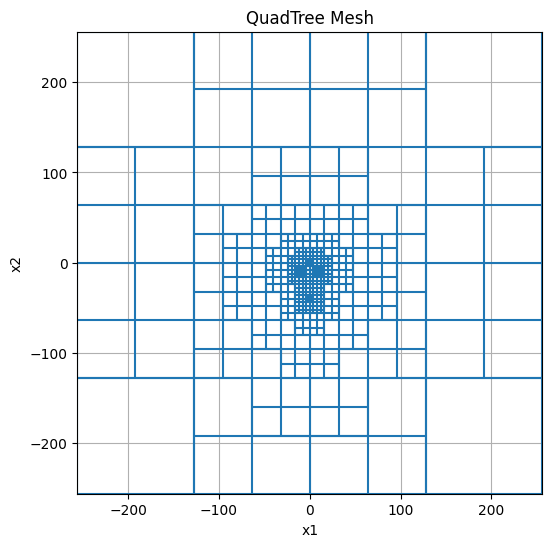

In [ ]:
from discretize import TreeMesh
from discretize.utils import mkvc
import matplotlib.pyplot as plt
import numpy as np

dx = 1  # minimum cell width (base mesh cell width) in x
dy = 1  # minimum cell width (base mesh cell width) in y

x_length = 300.0  # domain width in x
y_length = 300.0  # domain width in y

# Compute number of base mesh cells required in x and y
nbcx = 2 ** int(np.ceil(np.log2(x_length / dx)))
nbcy = 2 ** int(np.ceil(np.log2(y_length / dy)))

# Define the base mesh
hx = [(dx, nbcx)]
hy = [(dy, nbcy)]
mesh = TreeMesh([hx, hy], x0="CC")

# Refine surface topography
xx = mesh.nodes_x
yy = -3 * np.exp((xx**2) / 100**2) + 50.0
pts = np.c_[mkvc(xx), mkvc(yy)]
# print(yy)
padding = [[0, 2], [0, 2]]
# mesh.refine_surface(pts, padding_cells_by_level=padding, finalize=False)

# Refine mesh near points
xx = np.array([0.0, 10.0, 0.0, -10.0])
yy = np.array([-40.0, -10.0, 0.0, -10])
pts = np.c_[mkvc(xx), mkvc(yy)]
mesh.refine_points(pts, padding_cells_by_level=xx**0 + 1, finalize=False, level=8)

mesh.finalize()

# We can apply the plot_grid method and output to a specified axes object
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh.plot_grid(ax=ax)
ax.set_xbound(mesh.x0[0], mesh.x0[0] + np.sum(mesh.h[0]))
ax.set_ybound(mesh.x0[1], mesh.x0[1] + np.sum(mesh.h[1]))
ax.set_title("QuadTree Mesh")
